<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/Model/Regression_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
pd.set_option("display.max_columns", 100)
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config
set_config(transform_output="pandas")

In [21]:
#Load data
fpath="/content/drive/MyDrive/CodingDojo/02-MachineLearning/Week05/Data/ames-housing-dojo-for-ml.csv"
df = pd.read_csv(fpath)
df= df.set_index("PID")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2930 entries, 907227090 to 902201120
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MS Zoning         2930 non-null   object 
 1   Lot Frontage      2440 non-null   float64
 2   Lot Area          2930 non-null   int64  
 3   Street            2930 non-null   object 
 4   Alley             198 non-null    object 
 5   Utilities         2930 non-null   object 
 6   Neighborhood      2930 non-null   object 
 7   Bldg Type         2930 non-null   object 
 8   House Style       2930 non-null   object 
 9   Overall Qual      2930 non-null   int64  
 10  Overall Cond      2930 non-null   int64  
 11  Year Built        2930 non-null   int64  
 12  Year Remodeled    2930 non-null   int64  
 13  Exter Qual        2930 non-null   object 
 14  Exter Cond        2930 non-null   object 
 15  Bsmt Unf Sqft     2929 non-null   float64
 16  Total Bsmnt Sqft  2929 non-nu

,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Utilities,Neighborhood,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,SalePrice,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
907227090,RL,60.0,7200,Pave,NaN,AllPub,CollgCr,1Fam,1Story,5,8,1972,1972,TA,TA,427.0,864.0,Y,864.0,3,1,5,Detchd,1977.0,1.0,297.0,TA,TA,Y,MnPrv,119900.0,3,2006,1.0,0.0
527108010,RL,134.0,19378,Pave,NaN,AllPub,Gilbert,1Fam,2Story,7,5,2005,2006,Gd,TA,1335.0,1392.0,Y,2462.0,4,1,9,Attchd,2006.0,2.0,576.0,TA,TA,Y,NaN,320000.0,3,2006,3.0,1.0
534275170,RL,NaN,12772,Pave,NaN,AllPub,NAmes,1Fam,1Story,6,8,1960,1998,TA,Gd,460.0,958.0,Y,958.0,2,1,5,Attchd,1960.0,1.0,301.0,TA,TA,Y,NaN,151500.0,4,2007,1.0,0.0
528104050,RL,114.0,14803,Pave,NaN,AllPub,NridgHt,1Fam,1Story,10,5,2007,2008,Ex,TA,442.0,2078.0,Y,2084.0,2,1,7,Attchd,2007.0,3.0,1220.0,TA,TA,Y,NaN,385000.0,6,2008,3.0,0.0
533206070,FV,32.0,3784,Pave,Pave,AllPub,Somerst,TwnhsE,1Story,8,5,2006,2007,Gd,TA,1451.0,1511.0,Y,1565.0,2,1,5,Attchd,2006.0,2.0,476.0,TA,TA,Y,NaN,193800.0,2,2007,3.0,0.0


# Explore and Clean the Data

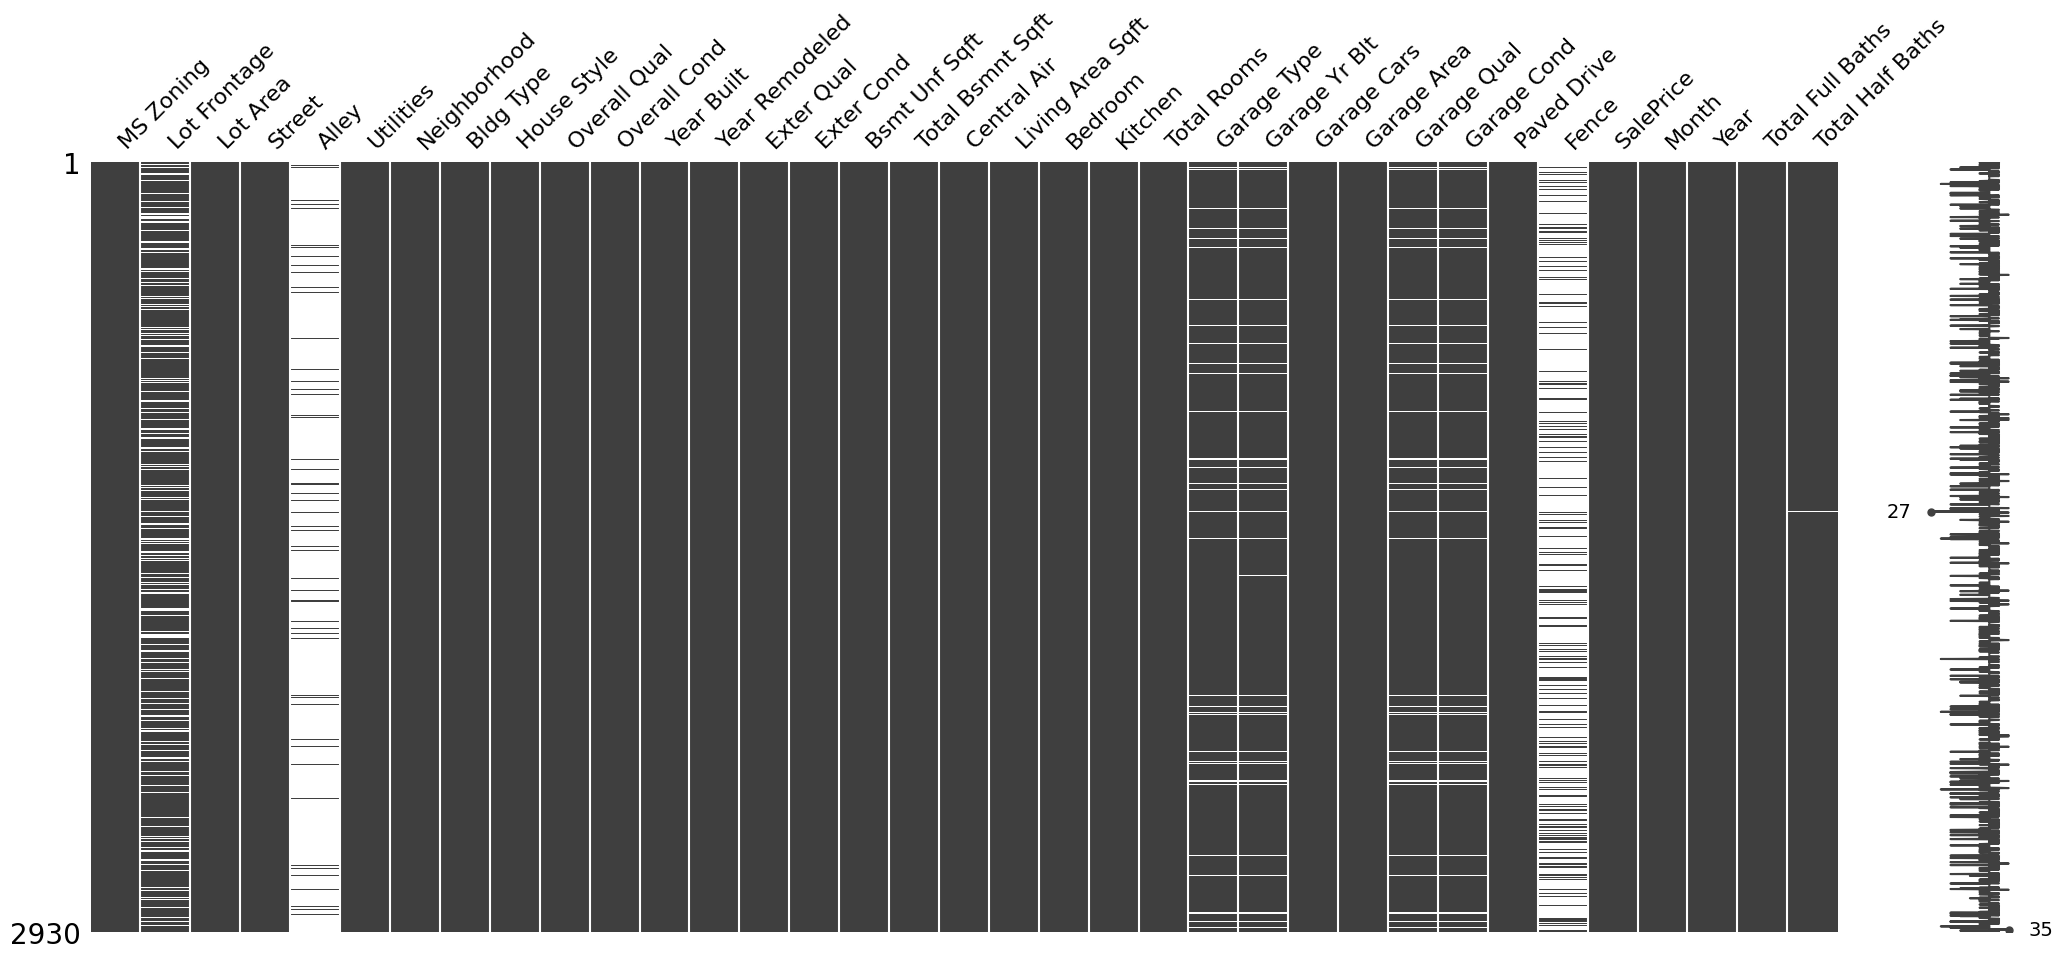

In [22]:
#Visual to see missing values per column
msno.matrix(df);

In [23]:
# Check for null values
df.isna().sum()

MS Zoning              0
Lot Frontage         490
Lot Area               0
Street                 0
Alley               2732
Utilities              0
Neighborhood           0
Bldg Type              0
House Style            0
Overall Qual           0
Overall Cond           0
Year Built             0
Year Remodeled         0
Exter Qual             0
Exter Cond             0
Bsmt Unf Sqft          1
Total Bsmnt Sqft       1
Central Air            0
Living Area Sqft       0
Bedroom                0
Kitchen                0
Total Rooms            0
Garage Type          157
Garage Yr Blt        160
Garage Cars            1
Garage Area            1
Garage Qual          159
Garage Cond          159
Paved Drive            0
Fence               2358
SalePrice              0
Month                  0
Year                   0
Total Full Baths       2
Total Half Baths       5
dtype: int64

#Validation Split

Based on our feature inspection, we have decided to drop the following features for the reasons listed:

* 'Utilities' (Quasi-constant)
* "Street" (Quasi-constant)
* 'MS Zoning' (Stakeholder can't change)
* 'Lot Frontage' (Stakeholder can't change)
* 'Lot Area', (Stakeholder can't change)
* 'Neighborhood' (Stakeholder can't change)
* 'Year Built' (Stakeholder can't change)




We use the * to drop everything in the list as well as SalePrice

In [24]:
# Separate features vs target & train/test split
drop_from_model = df.drop(columns=['Utilities', "Street",'MS Zoning','Lot Frontage',
                   'Lot Area','Neighborhood','Year Built'])
# Demonstrating "unpacking list" with star operator
[*drop_from_model, "SalePrice"]

['Alley',
 'Bldg Type',
 'House Style',
 'Overall Qual',
 'Overall Cond',
 'Year Remodeled',
 'Exter Qual',
 'Exter Cond',
 'Bsmt Unf Sqft',
 'Total Bsmnt Sqft',
 'Central Air',
 'Living Area Sqft',
 'Bedroom',
 'Kitchen',
 'Total Rooms',
 'Garage Type',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Garage Qual',
 'Garage Cond',
 'Paved Drive',
 'Fence',
 'SalePrice',
 'Month',
 'Year',
 'Total Full Baths',
 'Total Half Baths',
 'SalePrice']

In [25]:
#Separate features vs target & train/test split
drop_from_model = ['Utilities', # Quasi-constant
                   "Street", # Quasi-constant
                   'MS Zoning', # Stakeholder can't change
                   'Lot Frontage',  # Stakeholder can't change
                   'Lot Area', # Stakeholder can't change
                   'Neighborhood',  # Stakeholder can't change
                   'Year Built'] # Stakeholder can't change
X = df.drop(columns=[*drop_from_model, "SalePrice"])
y = df["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)
X_train.head()

,Alley,Bldg Type,House Style,Overall Qual,Overall Cond,Year Remodeled,Exter Qual,Exter Cond,Bsmt Unf Sqft,Total Bsmnt Sqft,Central Air,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Type,Garage Yr Blt,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Fence,Month,Year,Total Full Baths,Total Half Baths
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,NaN,1Fam,1Story,4,5,1994,TA,TA,0.0,0.0,N,943.0,3,1,5,Detchd,1958.0,1.0,308.0,TA,TA,N,NaN,8,2007,1.0,0.0
909254010,NaN,1Fam,2Story,7,8,1990,TA,TA,600.0,600.0,Y,1228.0,3,1,6,Detchd,1918.0,1.0,215.0,Fa,TA,Y,MnPrv,5,2009,1.0,0.0
531450090,NaN,1Fam,1Story,6,5,1991,TA,TA,78.0,1278.0,Y,1294.0,3,1,6,Attchd,1991.0,2.0,496.0,TA,TA,Y,GdWo,6,2008,3.0,0.0
903400040,Pave,1Fam,2Story,6,6,1950,TA,TA,764.0,764.0,Y,1824.0,3,1,8,Detchd,1940.0,2.0,520.0,TA,TA,N,GdPrv,7,2007,1.0,0.0
527107130,NaN,1Fam,SLvl,7,5,1997,TA,TA,100.0,384.0,Y,1628.0,3,1,7,BuiltIn,1996.0,2.0,390.0,TA,TA,Y,NaN,6,2009,2.0,1.0


# Preprocess the Data

##Numeric

In [26]:
## PREPROCESSING PIPELINE FOR NUMERIC DATA
# Save list of column names
num_cols = X_train.select_dtypes("number").columns
print("Numeric Columns:", num_cols)
# instantiate preprocessors
impute_median = SimpleImputer(strategy="median")
scale=StandardScaler()
# Make a numeric preprocessing pipeline
num_pipe = make_pipeline(impute_median, scale)
# Making a numeric tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
num_tuple = ("numeric", num_pipe, num_cols)

Numeric Columns: Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths', 'Total Half Baths'],
      dtype='object')


## Ordinal

In [27]:
## PREPROCESSING PIPELINE FOR ORDINAL DATA
# Save list of column names
ord_cols = ['Exter Qual','Exter Cond', 'Garage Qual',"Garage Cond"]
print("Ordinal Columns:", ord_cols)
# Create imputer for ordinal data 
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')
## Making the OrdinalEncoder
# Specifying order of categories for our  Ordinal Qual/Cond Columms
qual_cond_order = ['NA','Po', 'Fa', 'TA', 'Gd', 'Ex']
# Making the list of order lists for OrdinalEncoder
ordinal_category_orders = [qual_cond_order, qual_cond_order,
                           qual_cond_order, qual_cond_order]                           
ord_encoder = OrdinalEncoder(categories=ordinal_category_orders)
# Making a final scaler to scale category #'s
scaler_ord = StandardScaler()
## Making an ord_pipe 
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)
## Making an ordinal_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ord_tuple = ('ordinal', ord_pipe, ord_cols)

Ordinal Columns: ['Exter Qual', 'Exter Cond', 'Garage Qual', 'Garage Cond']


In [28]:
## PREPROCESSING PIPELINE FOR ONE-HOT-ENCODED DATA
# Save list of column names
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
print("OneHotEncoder Columns:", ohe_cols)
# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value = "NA")
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# Make pipeline with imputer and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)
# Making a ohe_tuple for ColumnTransformer
#           (choose_a_name, pipeline_or_transformer, list_of_columns)
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)

OneHotEncoder Columns: Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object')


In [29]:
# Create the Column Transformer
col_transformer = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple], 
                                    verbose_feature_names_out=False)
col_transformer

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Overall Qual', 'Overall Cond', 'Year Remodeled', 'Bsmt Unf Sqft',
       'Total Bsmnt Sqft', 'Living Area Sqft', 'Bedroom', 'Kitchen',
       'Total Rooms', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Month',
       'Year', 'Total Full Baths...
                                 ['Exter Qual', 'Exter Cond', 'Garage Qual',
                                  'Garage Cond']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Alley', 'Bldg Type', 'House Style', 'Central Air', 'Garage Type',
       'Paved Drive', 'Fence'],
      dtype='object'))],
                  verbose_feature_names_out=False)

In [30]:
# fit the column transformer on X_train
col_transformer.fit(X_train)
# Transform X_train and X_test
X_train_tf = col_transformer.transform(X_train)
X_test_tf = col_transformer.transform(X_test)
X_train_tf.head()

,Overall Qual,Overall Cond,Year Remodeled,Bsmt Unf Sqft,Total Bsmnt Sqft,Living Area Sqft,Bedroom,Kitchen,Total Rooms,Garage Yr Blt,Garage Cars,Garage Area,Month,Year,Total Full Baths,Total Half Baths,Exter Qual,Exter Cond,Garage Qual,Garage Cond,Alley_Grvl,Alley_NA,Alley_Pave,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Central Air_N,Central Air_Y,Garage Type_2Types,Garage Type_Attchd,Garage Type_Basment,Garage Type_BuiltIn,Garage Type_CarPort,Garage Type_Detchd,Garage Type_NA,Paved Drive_N,Paved Drive_P,Paved Drive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_NA
PID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
905475520,-1.453681,-0.502192,0.472590,-1.282165,-2.329907,-1.086450,0.183403,-0.203499,-0.909803,-0.820130,-0.989438,-0.743628,0.674753,-0.605551,-1.289301,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
909254010,0.648845,2.193205,0.282376,0.093593,-0.996395,-0.525568,0.183403,-0.203499,-0.275453,-2.455923,-0.989438,-1.169681,-0.439858,0.908844,-1.289301,-0.807982,-0.679141,-0.227105,-1.092567,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
531450090,-0.051997,-0.502192,0.329930,-1.103317,0.510475,-0.395679,0.183403,-0.203499,-0.275453,0.529399,0.313016,0.117642,-0.068321,0.151646,1.343221,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
903400040,-0.051997,0.396274,-1.619758,0.469633,-0.631901,0.647364,0.183403,-0.203499,0.993247,-1.556237,0.313016,0.227591,0.303216,-0.605551,-1.289301,-0.807982,-0.679141,-0.227105,0.282215,0.272525,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
527107130,0.648845,-0.502192,0.615250,-1.052872,-1.476459,0.261635,0.183403,-0.203499,0.358897,0.733873,0.313016,-0.367968,-0.068321,0.908844,0.026960,1.050800,-0.679141,-0.227105,0.282215,0.272525,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#Instantiate and Fit the Model

In [31]:
from sklearn.linear_model import LinearRegression
# Instantiate model
lin_reg = LinearRegression()
lin_reg.fit(X_train_tf, y_train)

LinearRegression()

# Get Predictions from the Model for Training and Testing Data

In [32]:
#Get predictions for training and test data
y_pred_train = lin_reg.predict(X_train_tf)
y_pred_test = lin_reg.predict(X_test_tf)

# MAE (Mean Absolute Error)

In [33]:
# Calculating MAE with numpy
train_MAE = np.mean(np.abs(y_pred_train - y_train))
test_MAE = np.mean(np.abs(y_pred_test - y_test))
print(f"Model Training MAE: {train_MAE:,.2f}")
print(f"Model Testing MAE: {test_MAE:,.2f}")

Model Training MAE: 21,158.21
Model Testing MAE: 19,928.76


-- Or, we can use the Scikit-Learn metrics function.--



## MAE using Python


In [34]:
#importing new libary for MAE
from sklearn.metrics import mean_absolute_error

## MAE using SKLearn

In [35]:
# Calculating MAE with sklearn
train_MAE = mean_absolute_error(y_train, y_pred_train)
test_MAE = mean_absolute_error(y_test, y_pred_test)
print(f"Model Training for MAE: {train_MAE:,.2f}")
print(f"Model Test for MAE: {test_MAE:,.2f}")

Model Training for MAE: 21,158.21
Model Test for MAE: 19,928.76


#Mean Square Error

ML prefers a little wrong for all of the data vs. a model that is very wrong for only some of the data.

## MSE using Python


In [37]:
train_MSE = np.mean((y_pred_train-y_train)** 2)
test_MSE = np.mean((y_pred_test - y_test)** 2)
print(f"Model Training for MSE: {train_MSE:,.2f}")
print(f"Model Test for MSE: {test_MSE:,.2f}")

Model Training for MSE: 1,151,857,608.08
Model Test for MSE: 850,685,987.08


## MSE using SKLearn

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
train_MSE = mean_squared_error(y_train, y_pred_train)
test_MSE  = mean_squared_error(y_test, y_pred_test)
print(f"Model Training for MSE: {train_MSE:,.2f}")
print(f"Model Testing for MSE: {test_MSE:,.2f}")

Model Training for MSE: 1,151,857,608.08
Model Testing for MSE: 850,685,987.08


## RMSE using Python

In [41]:
# Calculating RMSE with numpy
train_RMSE = np.sqrt(np.mean((y_pred_train - y_train)**2))
test_RMSE = np.sqrt(np.mean((y_pred_test - y_test)**2))
print(f'Model Training RMSE: {train_RMSE:,.2f}')
print(f'Model Testing RMSE: {test_RMSE:,.2f}')

Model Training RMSE: 33,939.03
Model Testing RMSE: 29,166.52


## RMSE using SKLearn

In [42]:
# Calculating RMSE with sklearn
train_RMSE = mean_squared_error(y_train, y_pred_train, squared=False)
test_RMSE = mean_squared_error(y_test, y_pred_test, squared=False)
print(f"Model Training RMSE: {train_RMSE:,.2f}")
print(f"Model Test RMSE: {test_RMSE:,.2f}")

Model Training RMSE: 33,939.03
Model Test RMSE: 29,166.52


# Calculating R-squared


## R-Squared using Python

In [44]:
# Calculating R-Squared
train_r2 = np.corrcoef(y_train, y_pred_train)[0][1]**2
test_r2 = np.corrcoef(y_test, y_pred_test)[0][1]**2
print(f"Model Training R2: {train_r2:,.2f}")
print(f"Model Test R2: {test_r2:,.2f}")

Model Training R2: 0.83
Model Test R2: 0.84


## R-Squared using SKLearn

In [45]:
from sklearn.metrics import r2_score
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
print(f"Model Training R2: {train_r2:,.2f}")
print(f"Model Testing R2: {test_r2:,.2f}")

Model Training R2: 0.83
Model Testing R2: 0.83
